 <center><h1>Apple Quantity visualization</h1></center>

In this project, my goal is to visualize the quality data of apples. As one of the most consumed fruits in the world, the quality of apples has an important impact on consumer satisfaction and market sales. The quality of apples is determined by many factors, such as size, weight, sweetness, crispness, juiciness, maturity, acidity, etc. By visualizing these attributes, I can deeply analyze the relationship between these features and help fruit farmers and distributors better understand the key factors affecting apple quality.

I used the apple_quality.csv dataset from Kaggle which contains information on different apple attributes and their overall quality ratings such as: A_id: unique identifier for each fruit; size: size of the fruit; weight: weight of the fruit; sweetness: sweetness of the fruit; crispness: texture: indicates crispness of the fruit; juiciness: juiciness of the fruit; ripeness: ripeness of the fruit; acidity: acidity of the fruit; quality: overall quality of the fruit. This project aims to provide clear insights through visualizations.


In [39]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np 
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

In [29]:
!pip install wordcloud

In [32]:
!pip install graphviz

In [37]:
!brew install graphviz

To reinstall 12.2.0, run:
  brew reinstall graphviz


In [40]:
df=pd.read_csv(r"/Users/baby/Desktop/desktop file/2415/Midterm report/apple_quality.csv")

In [41]:
df.drop(['A_id'],axis=1,inplace=True)
pd.isnull(df).head()

Size  Weight  Sweetness  Crunchiness  Juiciness  Ripeness  Acidity  \
0  False   False      False        False      False     False    False   
1  False   False      False        False      False     False    False   
2  False   False      False        False      False     False    False   
3  False   False      False        False      False     False    False   
4  False   False      False        False      False     False    False   

   Quality  
0    False  
1    False  
2    False  
3    False  
4    False

In [42]:
last_row_index = len(df) - 1
df = df.drop(last_row_index)
pd.isnull(df).sum()

Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

The significance of this column's output is to show that all columns in the dataset have zero missing values.

In [43]:
numeric_data = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_data.corr()

fig = ff.create_annotated_heatmap(
    z=corr_matrix.values,
    x=list(corr_matrix.columns),
    y=list(corr_matrix.index),
    colorscale='Blues',
    annotation_text=corr_matrix.round(2).values,
    showscale=True
)

fig.update_layout(title="Correlation Heatmap", width=850, height=850)
fig.show()

The color shades in the graph indicate the strength of the correlation, ranging from light blue (weak or no correlation) to dark blue (strong negative or strong positive correlation). The number in each cell indicates the Pearson's correlation coefficient between the two variables (range: -1 to 1, where 1: perfect positive correlation. -1: perfect negative correlation. 0: no correlation.) 1: perfect positive correlation. -1: perfect negative correlation. 0: no correlation.) . The horizontal and vertical axes list the variables in the apple data, such as size, sweetness, crispness, etc., respectively.


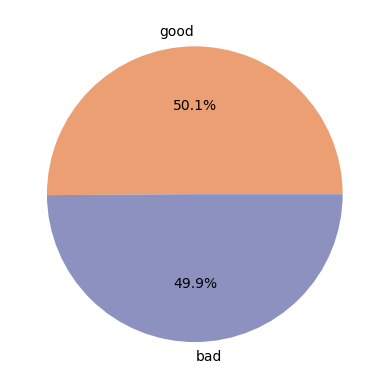

In [17]:
colors = ['#EC9F72', '#8D91C0']  
plt.pie(list(df['Quality'].value_counts()), 
        labels=list(df['Quality'].value_counts().keys()), 
        autopct='%0.1f%%', 
        colors=colors)  
plt.show()

This pie chart visualizes the distribution of quality categories in the apple dataset by distinguishing between “good” and “bad” data using orange and purple colors: the area of ​​the orange pie chart represents 50.1% of the apples are of “good” quality, and the area of ​​the purple pie chart represents 49.9% of the apples are of “bad” quality.

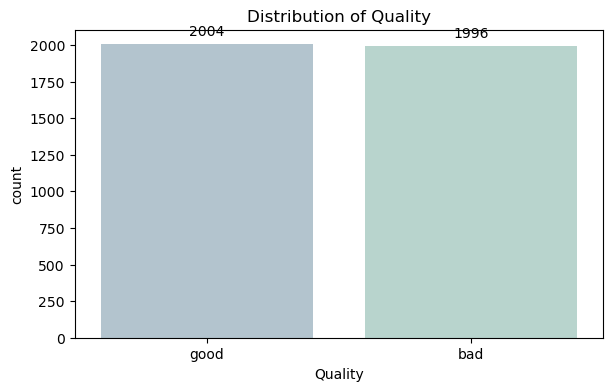

In [18]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('Distribution of Quality')

ax = sns.countplot(x=df['Quality'], palette=['#AEC5D3', '#B3D9CF'])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.show()

The bar chart shows the number distribution of apples with "good" and "poor" quality, and shows the specific values at the top of each column:
The blue bar chart represents the number of "good" apples, which is about 2004.
The purple bar chart represents the number of "bad" apples, which is about 1996.

This bar chart visually shows the difference in the number of apples between the two categories. It can be seen that the distribution of the two types of apples in the data set is roughly the same.

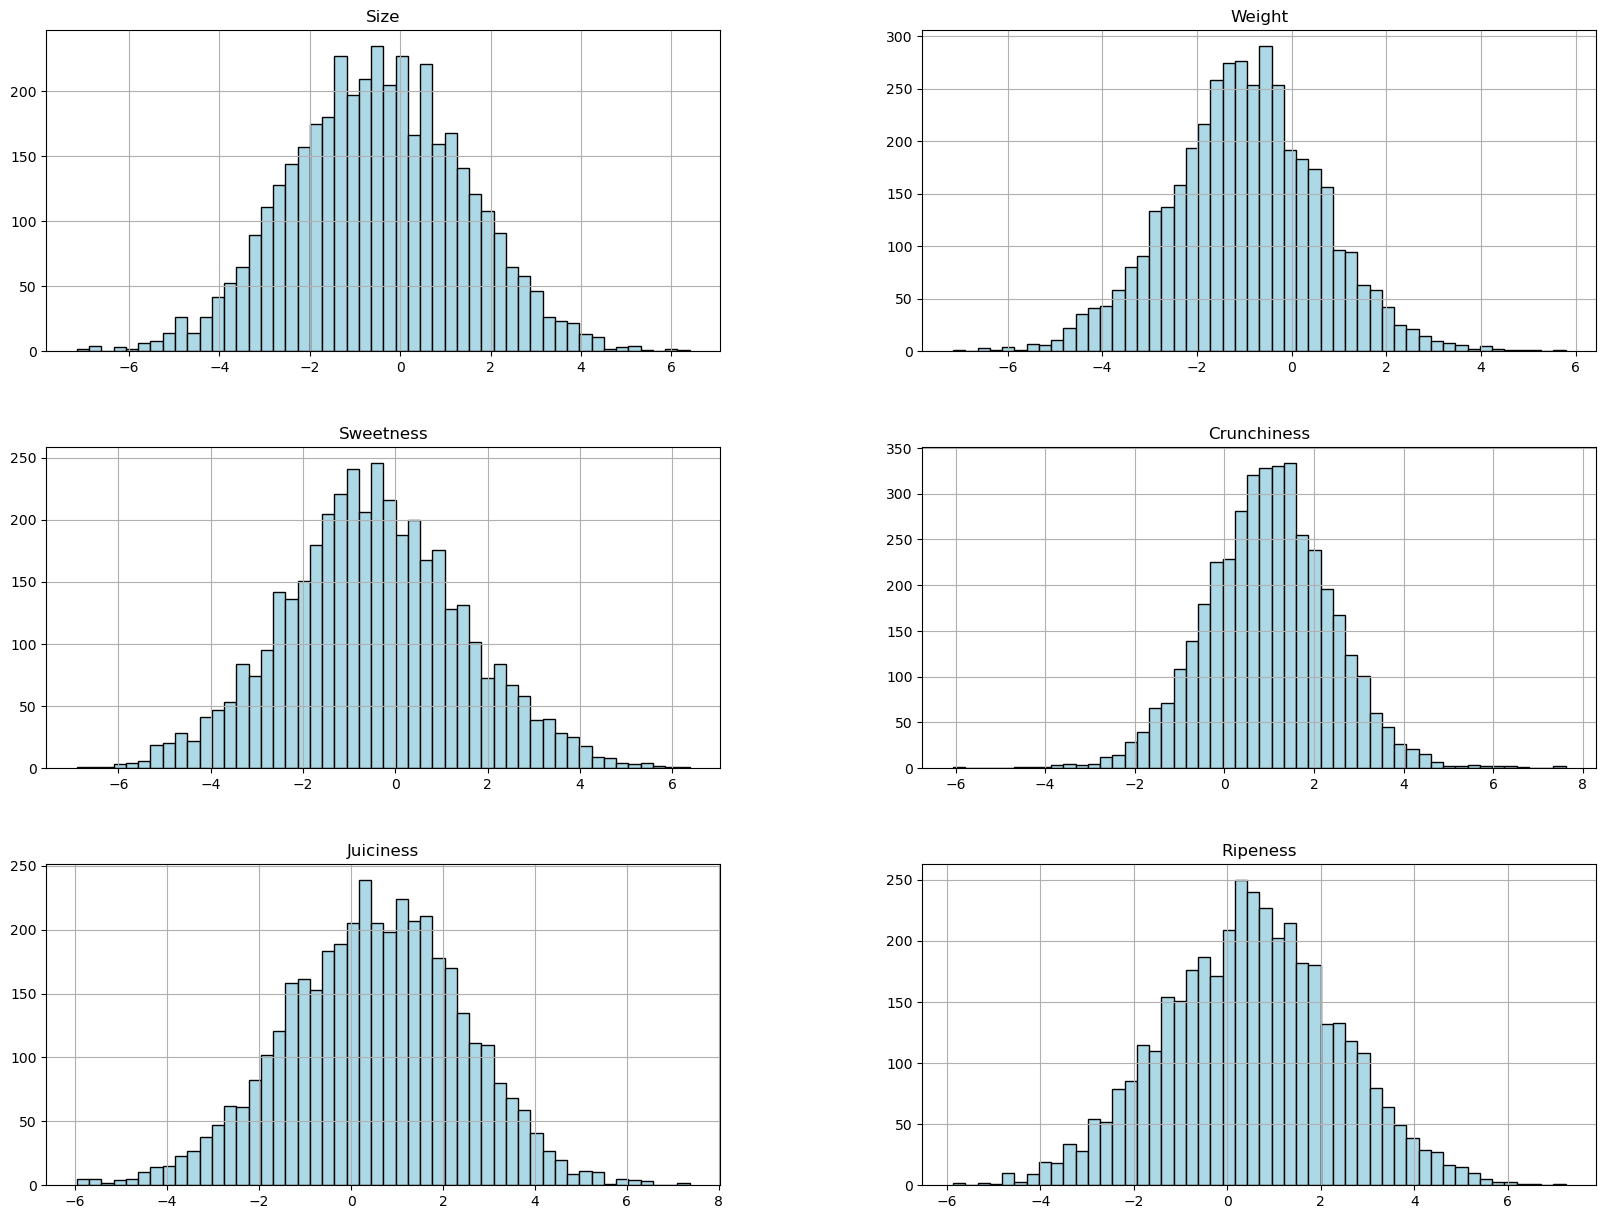

In [19]:
df.hist(bins=50, figsize=(20, 15), color='lightblue', edgecolor='black')
plt.show()

In this step, six histograms are generated, which respectively show the distribution of data points with the following attributes:

Size: shows the distribution of the size of apples in the data set, showing a shape close to normal distribution.

Weight: the distribution of apple weight, the distribution curve is similar to the size, close to normal distribution.

Sweetness: It shows the distribution of apple sweetness, which is also close to normal distribution.

Crunchiness: The distribution of apple crispness is symmetrical.

Juiciness: The distribution of apple juiciness also presents a relatively uniform distribution.

Ripeness: the distribution of apple maturity, this attribute in the data set also shows a normal distribution trend.

These histograms show the distribution patterns of different attributes in the dataset. By observing these charts, we can find that most of these attributes are close to normal distribution, indicating that the data distribution is relatively uniform.

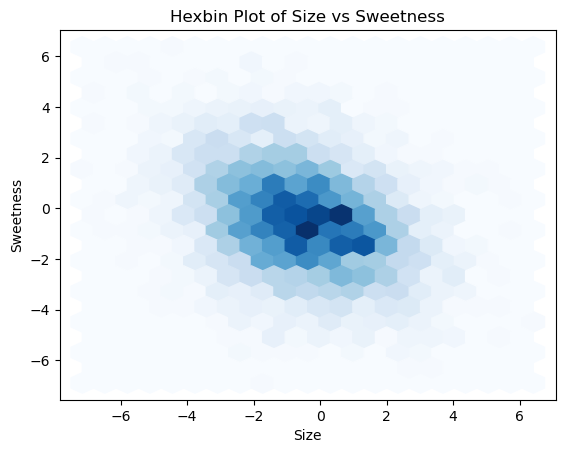

In [20]:
import matplotlib.pyplot as plt
plt.hexbin(df['Size'], df['Sweetness'], gridsize=20, cmap='Blues')
plt.xlabel('Size')
plt.ylabel('Sweetness')
plt.title('Hexbin Plot of Size vs Sweetness')
plt.show()

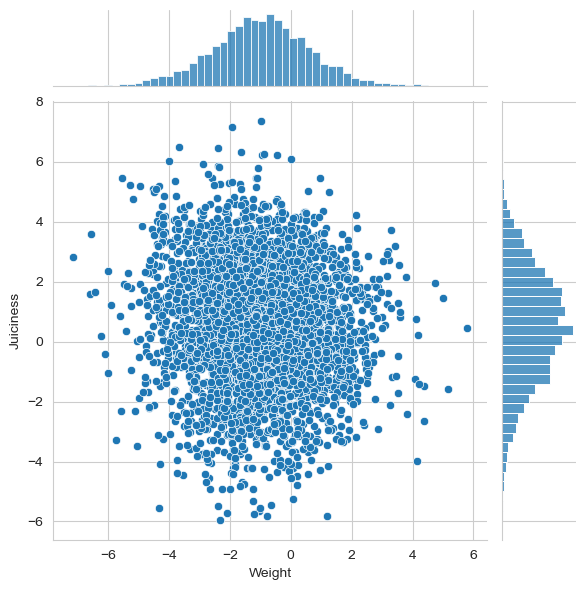

In [25]:
sns.set_style("whitegrid")
sns.jointplot(x="Weight", y="Juiciness", data=df)

plt.show()

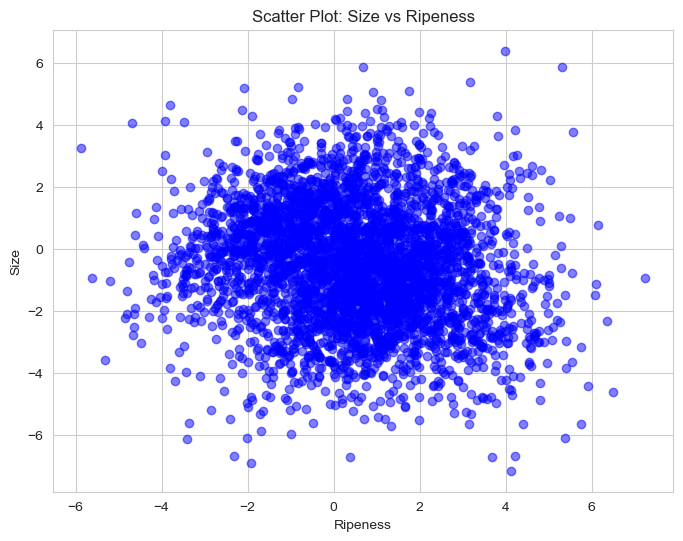

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Ripeness'], df['Size'], color='blue', alpha=0.5)

plt.xlabel('Ripeness')
plt.ylabel('Size')
plt.title('Scatter Plot: Size vs Ripeness')

plt.grid(True)
plt.show()

In [28]:
import plotly.express as px

fig = px.scatter(df, x="Sweetness", y="Crunchiness", color="Quality", title='Sweetness x Crunchiness')
fig.update_layout(template='plotly_white')  # Set background to white

fig1 = px.scatter(df, x="Weight", y="Size", color="Quality", title='Weight x Size')
fig1.update_layout(template='plotly_white')  # Set background to white

fig.show()
fig1.show()

The chart generated in this step is a hexagonal heat map that shows the relationship between apple size and sweetness. The color of the hexagon in the figure represents the density of data points, and the darker the area, the more apple data points there are in that range.
Through this chart, we can intuitively see whether there is a pattern or trend between size and sweetness.

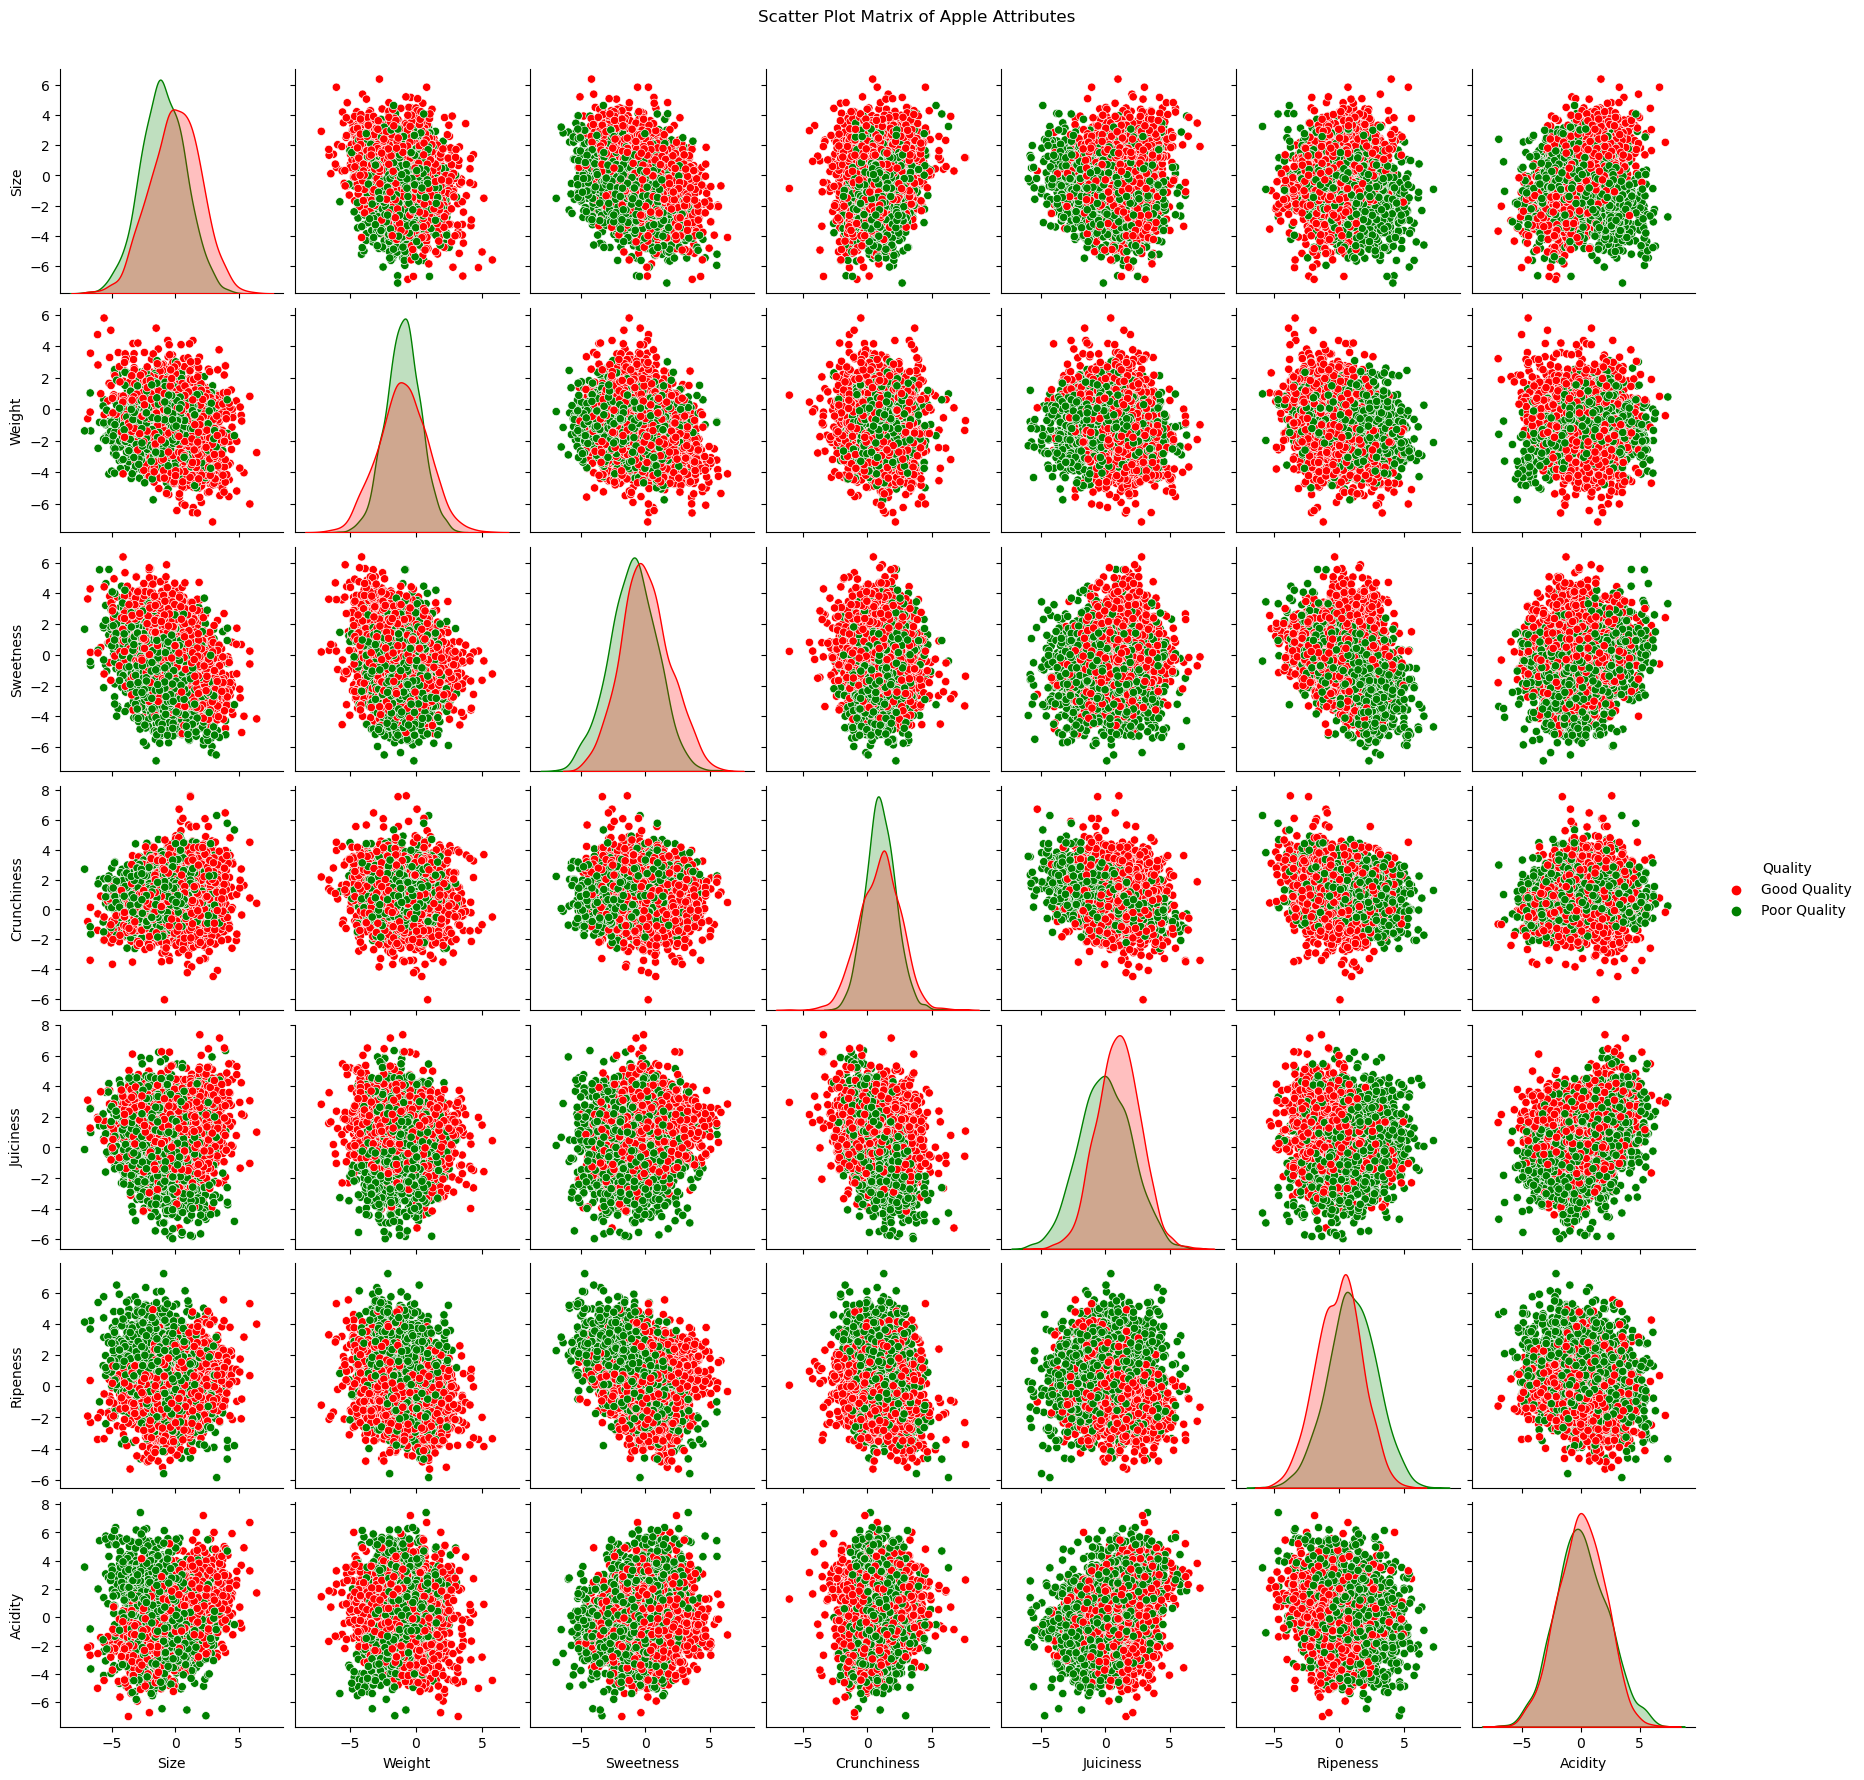

In [26]:
df = pd.read_csv(r"/Users/baby/Desktop/desktop file/2415/Midterm report/apple_quality.csv")

df.drop(['A_id'], axis=1, inplace=True)
last_row_index = len(df) - 1
df = df.drop(last_row_index)

numeric_columns = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')  
df['Quality'] = df['Quality'].map({'good': 'Good Quality', 'bad': 'Poor Quality'})

columns = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']

sns.pairplot(
    data=df,
    vars=columns,
    hue='Quality',
    palette={'Good Quality': 'red', 'Poor Quality': 'green'},
    diag_kind='kde'
)

plt.suptitle("Scatter Plot Matrix of Apple Attributes", y=1.02)
plt.show()

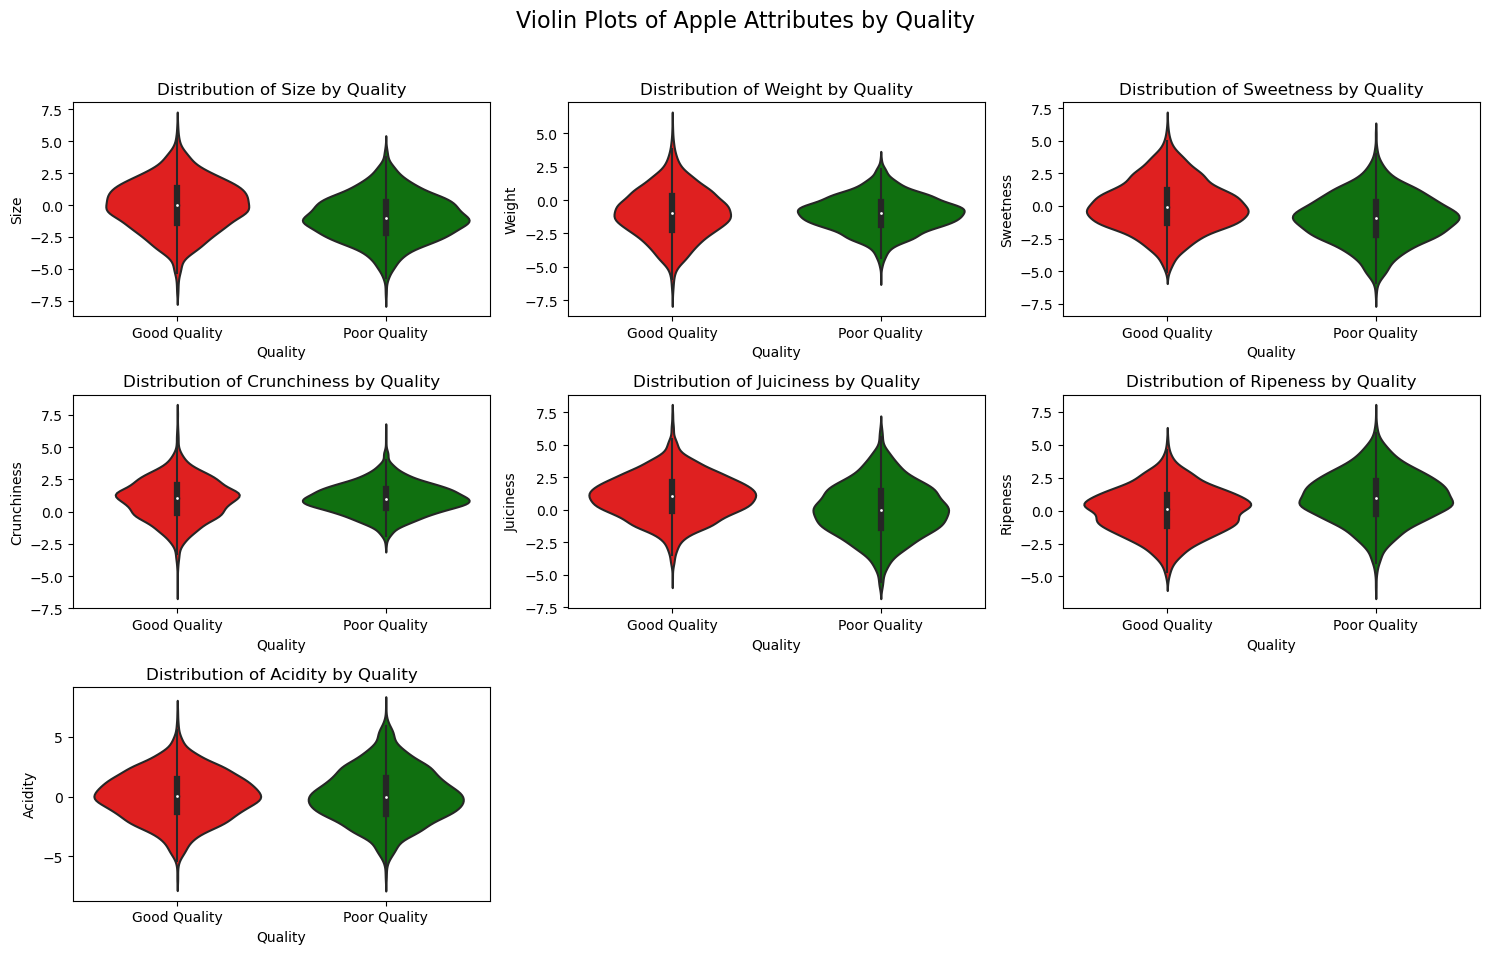

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r"/Users/baby/Desktop/desktop file/2415/Midterm report/apple_quality.csv")
df.drop(['A_id'], axis=1, inplace=True)
last_row_index = len(df) - 1
df = df.drop(last_row_index)

numeric_columns = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
df['Quality'] = df['Quality'].map({'good': 'Good Quality', 'bad': 'Poor Quality'})

plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns):
    plt.subplot(3, 3, i + 1)  
    sns.violinplot(
        data=df,
        x='Quality',
        y=column,
        palette={'Good Quality': 'red', 'Poor Quality': 'green'}
    )
    plt.title(f'Distribution of {column} by Quality')

plt.suptitle("Violin Plots of Apple Attributes by Quality", fontsize=16, y=0.95)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


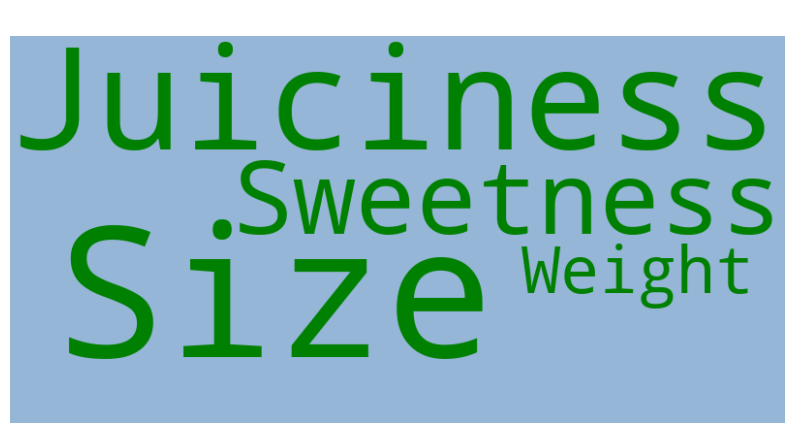

In [23]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from wordcloud import WordCloud

df = pd.read_csv(r"/Users/baby/Desktop/desktop file/2415/Midterm report/apple_quality.csv")
df = df.dropna(subset=['Quality'])
df['Quality'] = df['Quality'].astype(str)

X = df[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness']]
y = df['Quality']
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
clf.fit(X, y)

feature_importances = dict(zip(X.columns, clf.feature_importances_))

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='#96B6D8',  
    color_func=lambda *args, **kwargs: "green",  
).generate_from_frequencies(feature_importances)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title("Feature Importance Word Cloud", fontsize=16, color="white")
plt.show()


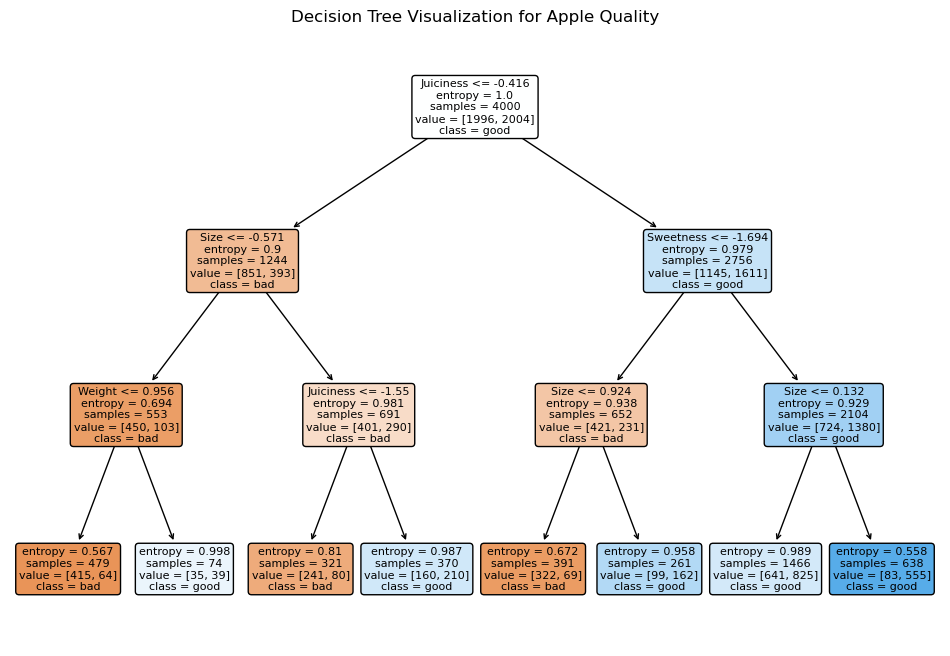

In [14]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

df = pd.read_csv(r"/Users/baby/Desktop/desktop file/2415/Midterm report/apple_quality.csv")
df = df.dropna(subset=['Quality'])
df['Quality'] = df['Quality'].astype(str)

X = df[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness']]
y = df['Quality']

clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
clf.fit(X, y)

plt.figure(figsize=(12, 8))  
tree.plot_tree(
    clf, 
    feature_names=list(X.columns),  
    class_names=list(clf.classes_),  
    filled=True, 
    rounded=True, 
    fontsize=8  
)
plt.title("Decision Tree Visualization for Apple Quality")  
plt.show()
